In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras 
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [4]:
df=pd.read_csv(r"C:\Users\rakes\Downloads\ITC.NS.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,5.550000,5.600000,5.533333,5.583333,3.323907,985500.0
1,02-01-1996,5.466666,5.566666,5.288888,5.372222,3.198226,7470000.0
2,03-01-1996,5.133333,5.254444,5.101111,5.200000,3.095698,15160500.0
3,04-01-1996,5.200000,5.332222,5.144444,5.297777,3.153908,12397500.0
4,05-01-1996,5.297777,5.277777,5.188888,5.202222,3.097020,5008500.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6885,10-05-2023,423.950012,426.350006,422.200012,425.350006,425.350006,9754485.0
6886,11-05-2023,427.250000,427.399994,418.899994,420.399994,420.399994,15982423.0
6887,12-05-2023,420.399994,422.700012,416.049988,420.450012,420.450012,11135894.0
6888,15-05-2023,420.000000,428.700012,419.049988,427.799988,427.799988,9151102.0
6889,16-05-2023,430.000000,430.000000,423.500000,423.950012,423.950012,7994197.0


In [6]:
df.shape

(6890, 7)

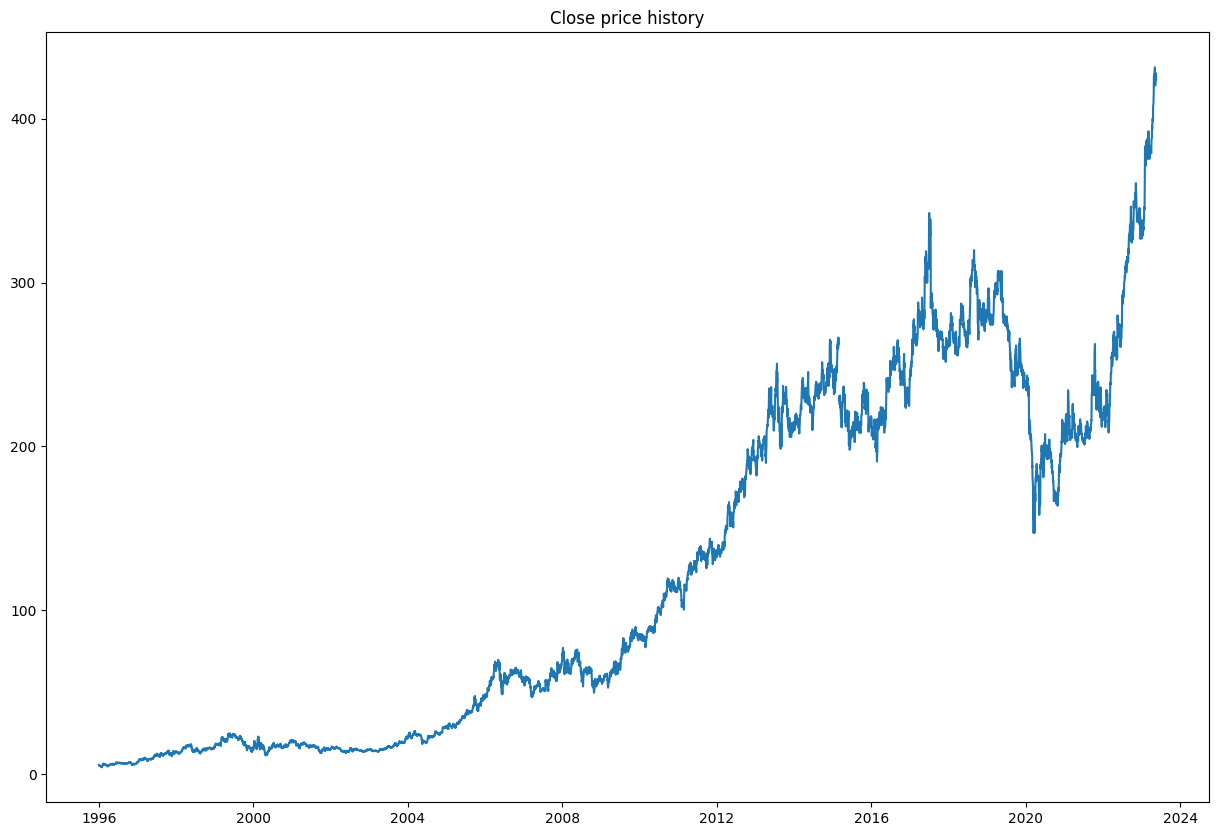

In [7]:
df["Date"]=pd.to_datetime(df.Date,format="%d-%m-%Y")
df.index=df['Date']

plt.figure(figsize=(15,10))
plt.title("Close price history")
plt.plot(df["Close"])

In [8]:
data=df.sort_index(ascending=True,axis=0)

new_dataset=pd.DataFrame(index=range(0,len(df)),columns=["Date",'Close'])

for i in range(len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]
    
new_dataset=new_dataset.dropna()
new_dataset

,Date,Close
0,1996-01-01 00:00:00,5.583333
1,1996-01-02 00:00:00,5.372222
2,1996-01-03 00:00:00,5.2
3,1996-01-04 00:00:00,5.297777
4,1996-01-05 00:00:00,5.202222
...,...,...
6885,2023-05-10 00:00:00,425.350006
6886,2023-05-11 00:00:00,420.399994
6887,2023-05-12 00:00:00,420.450012
6888,2023-05-15 00:00:00,427.799988


In [9]:
scaler=MinMaxScaler()

final_dataset=new_dataset.values

train_data=final_dataset[:4000, :4000]
test_data=final_dataset[4000: , 4000:]

In [10]:
scaled_data=scaler.fit_transform(final_dataset[:,1:])
scaled_data

array([[0.00327923],
       [0.00278514],
       [0.00238206],
       ...,
       [0.97425502],
       [0.99145729],
       [0.98244661]])

In [11]:
X_train_data, y_train_data = [], []
for i in range(60,len(train_data)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)
X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))
X_train_data

array([[[0.00327923],
        [0.00278514],
        [0.00238206],
        ...,
        [0.00212201],
        [0.00245748],
        [0.00176314]],

       [[0.00278514],
        [0.00238206],
        [0.0026109 ],
        ...,
        [0.00245748],
        [0.00176314],
        [0.00098299]],

       [[0.00238206],
        [0.0026109 ],
        [0.00238726],
        ...,
        [0.00176314],
        [0.00098299],
        [0.00133146]],

       ...,

       [[0.29439251],
        [0.29447054],
        [0.28924352],
        ...,
        [0.30531463],
        [0.30227204],
        [0.30734303]],

       [[0.29447054],
        [0.28924352],
        [0.2880733 ],
        ...,
        [0.30227204],
        [0.30734303],
        [0.30656289]],

       [[0.28924352],
        [0.2880733 ],
        [0.2926762 ],
        ...,
        [0.30734303],
        [0.30656289],
        [0.30664089]]])

In [12]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


inputs_data = new_dataset[len(new_dataset) - len(test_data) - 60:].iloc[:, 1:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.fit_transform(inputs_data)

lstm_model.compile(loss='mean_squared_error', optimizer = 'adam')
lstm_model.fit(X_train_data,y_train_data, epochs=1, batch_size=1, verbose=2)

3940/3940 - 167s - loss: 9.0165e-05 - 167s/epoch - 42ms/step


In [13]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

90/90 [==============================] - 2s 15ms/step


In [14]:
predicted_closing_price

array([[134.36307],
       [134.13805],
       [133.70697],
       ...,
       [421.21722],
       [420.1342 ],
       [420.06552]], dtype=float32)

C:\Users\rakes\AppData\Local\Temp\ipykernel_15144\809686405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predicted_closing_price


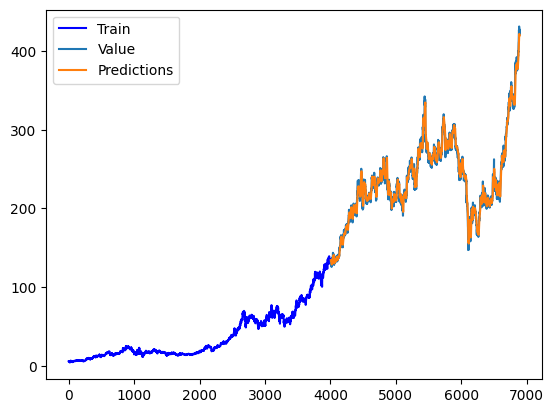

In [15]:
train_data=new_dataset[:4000]
test_data=new_dataset[4000:]
test_data['Predictions'] = predicted_closing_price
plt.plot(train_data['Close'], color='blue', label = 'Actual Stock Price')
plt.plot(test_data[[ 'Close','Predictions']])
plt.legend(['Train','Value','Predictions'],loc='upper left')
plt.show()